In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.colors as mcolors

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

data_path = 'final_df'
folders = ['TAC','Data2Text','Captioning','Dialogue','SUMM','MT/WMT15','MT/WMT16','MT/WMT17','MT/WMT18','MT/WMT19','MT/WMT20','MT/WMT21']
#folders = ['Data2Text','Captioning','Dialogue','SUMM']
files = {}
for folder in folders:
    files[folder] = [fn for fn in glob.glob(f'{data_path}/{folder}/**/*.csv',recursive=True) 
         if not 'system_level' in fn]

dfs =  {}
for folder in folders:
    for file in files[folder]:
        print(file)
        dfs[file] = pd.read_csv(file)


final_df/TAC/TAC_09.csv
final_df/TAC/TAC_11.csv
final_df/TAC/TAC_08.csv
final_df/Data2Text/WebNLG2017/instance_level/WebNLG2017.csv
final_df/Data2Text/WebNLG2020/instance_level/WebNLG2020_rdf2text_en.csv
final_df/Data2Text/WebNLG2020/instance_level/WebNLG2020_rdf2text_ru.csv
final_df/Captioning/Flickr_data.csv
final_df/Captioning/coco_data.csv
final_df/Dialogue/DIALOGUE_pc_data.csv
final_df/Dialogue/DIALOGUE_tc_data.csv
final_df/SUMM/SUMM.csv
final_df/MT/WMT15/newstest2015.en-fi.data.csv
final_df/MT/WMT15/newstest2015.en-de.data.csv
final_df/MT/WMT15/newstest2015.de-en.data.csv
final_df/MT/WMT15/newstest2015.ru-en.data.csv
final_df/MT/WMT15/newstest2015.cs-en.data.csv
final_df/MT/WMT15/newstest2015.en-cs.data.csv
final_df/MT/WMT15/newstest2015.en-ru.data.csv
final_df/MT/WMT15/newstest2015.fi-en.data.csv
final_df/MT/WMT16/newstest2016.de-en.data.csv
final_df/MT/WMT16/newstest2016.en-ro.data.csv
final_df/MT/WMT16/newstest2016.en-fi.data.csv
final_df/MT/WMT16/newstest2016.en-ru.data.csv
f

In [21]:
for folder in folders:
    files[folder]=sorted(files[folder])

filename_to_label = {}
for folder in folders:
    for file in files[folder]:
        filename_to_label[file] = os.path.basename(file).split('/')[-1].replace('_data',"").replace('.csv','').replace('.data','').replace('coco','Captioning').replace('SUMM','SummEval')

In [4]:
# total_bars = len([(os.path.basename(file) for file in files[folders[i]]) for i in range(len(folders))])
# fig, axs = plt.subplots(1, len(folders),figsize=(total_bars*0.2,6),gridspec_kw={'width_ratios': [len(files[folders[i]]) for i in range(len(folders))]})
# #gs = gridspec.GridSpec(1, len(folders), width_ratios=[len(files[folders[i]]) for i in range(len(folders))])
# #axs = []
# #for g in gs:
# #    axs.append(plt.subplot(g))

# for i in range(len(folders)):
#     #axs[i].set_xlim(-1,len(files[folders[i]]))
#     axs[i].set_title(folders[i])
#     bins = [os.path.basename(file) for file in files[folders[i]]]
#     axs[i].set_xticklabels(bins,rotation=90)
#     axs[i].spines['top'].set_visible(False)
#     axs[i].spines['right'].set_visible(False)
#     for file in files[folders[i]]:
#         df = dfs[file]
#         axs[i].bar(os.path.basename(file), sum(~df.System.duplicated()),color='tab:blue')
# fig.suptitle('Number of systems')
# plt.subplots_adjust(wspace=0.5)
# plt.show()
    
    
# # afficher pour chaque fichier le nombre de systèmes
# # afficher dans la legende le nombres de metriques et le nombre de human score
# # afficher le titre et le nom des axes
# # fixer les couleurs
# # afficher le total de phrases, et le total de metriques calculées

In [5]:
# fig, axs = plt.subplots(1, len(folders),figsize=(total_bars*0.2,6),gridspec_kw={'width_ratios': [len(files[folders[i]]) for i in range(len(folders))]})
# #gs = gridspec.GridSpec(1, len(folders), width_ratios=[len(files[folders[i]]) for i in range(len(folders))])
# #axs = []
# #for g in gs:
# #    axs.append(plt.subplot(g))
# fig.suptitle('Number of utterances in total')
# for i in range(len(folders)):
#     #axs[i].set_xlim(-1,len(files[folders[i]]))
#     axs[i].set_title(folders[i])
#     bins = [os.path.basename(file) for file in files[folders[i]]]
#     axs[i].set_xticklabels(bins,rotation=90)
#     axs[i].spines['top'].set_visible(False)
#     axs[i].spines['right'].set_visible(False)
#     for file in files[folders[i]]:
#         df = dfs[file]
#         axs[i].bar(os.path.basename(file), len(df),color='tab:blue')
#         axs[i].set_yscale('log')
# plt.subplots_adjust(wspace=1)
# plt.show()
    

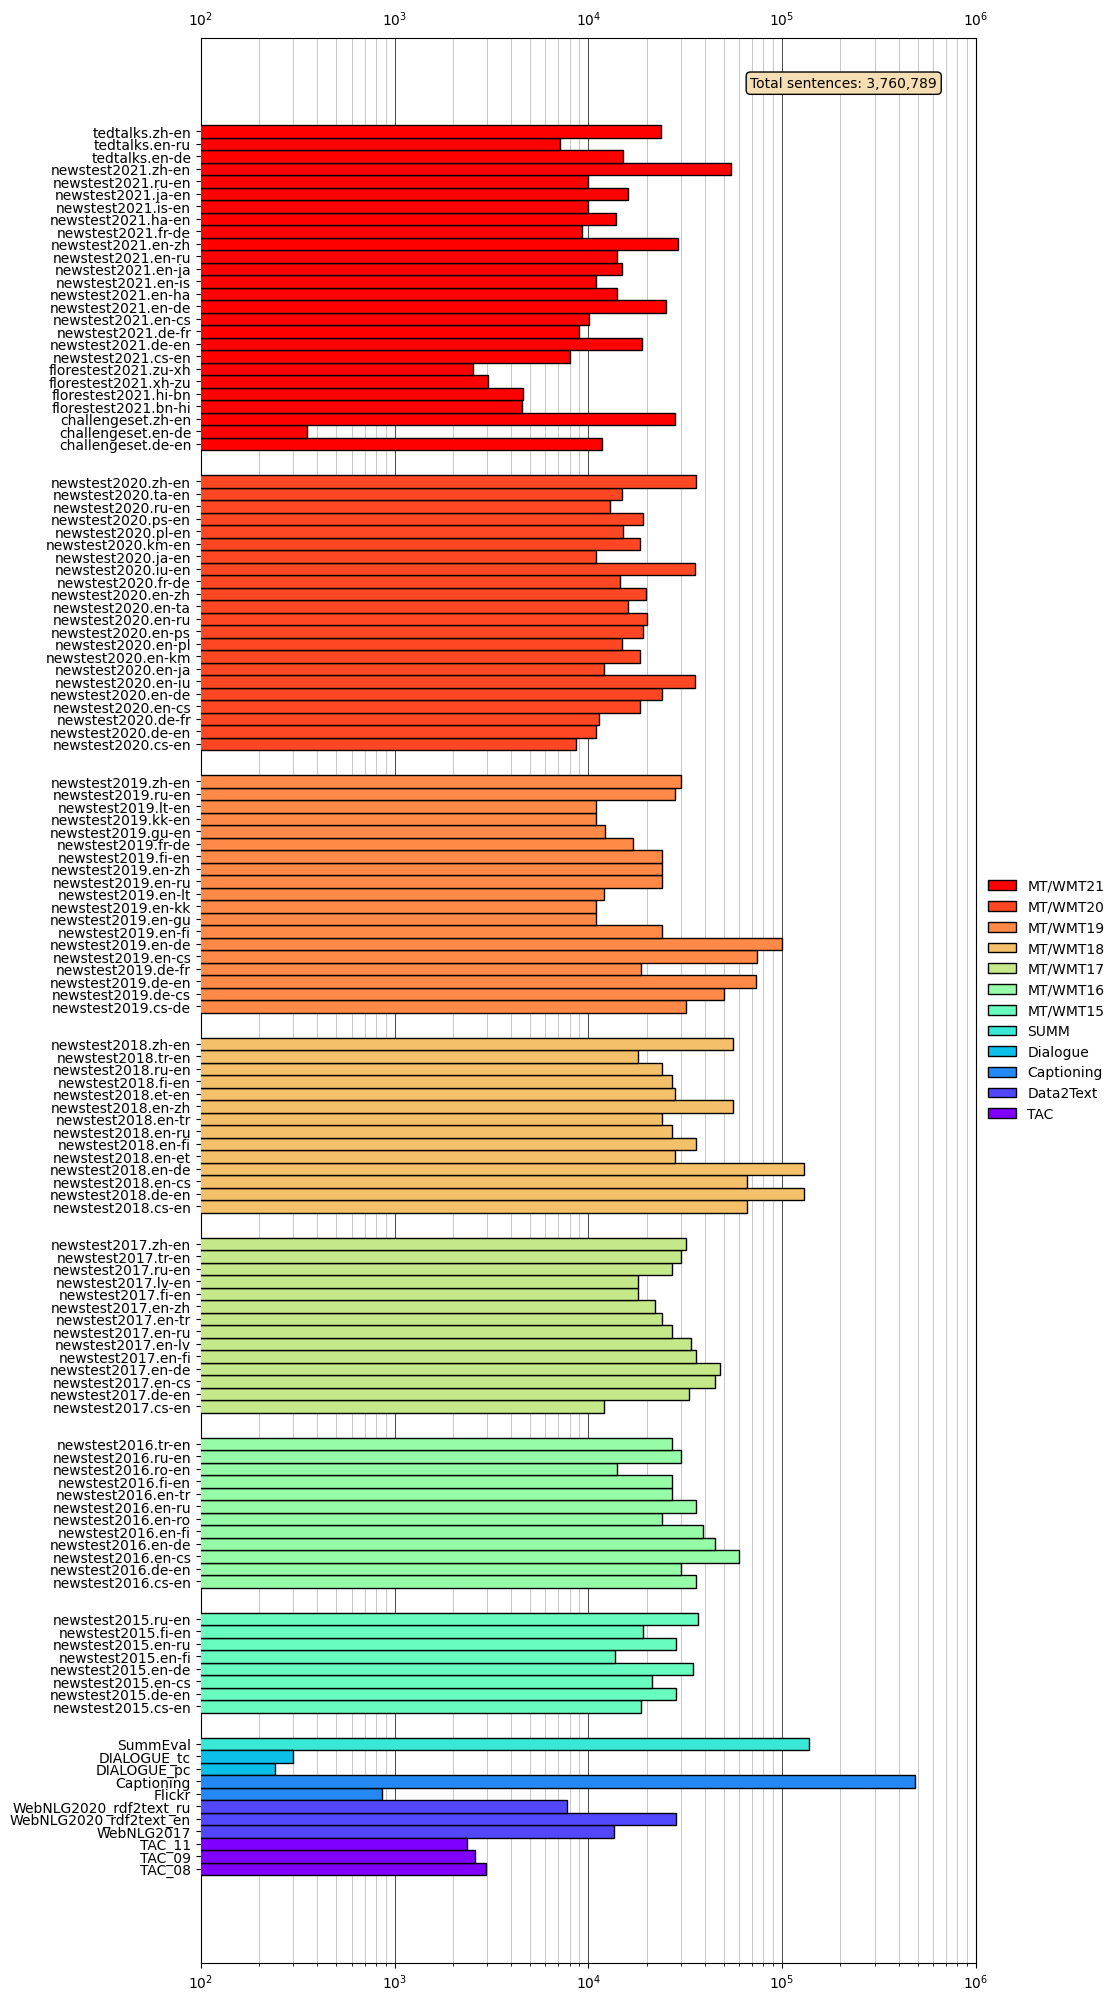

In [28]:
groups=folders
categories = files
values = [len(dfs[file]) for folder in groups for file in categories[folder]]

# Define the figure size and layout
fig, ax = plt.subplots(figsize=(10, 25))
#fig.subplots_adjust(left=0.2, bottom=0.1)

# Set the y-axis labels to the folder names
#ax.set_yticks(np.arange(len(groups)) + 0.5)
labels = sum(list(categories.values()),[])

# Calculate the bar width based on the number of categories in each group
#max_categories = max(len(categories[g]) for g in groups)
bar_width = 0.5

predefined_colors = plt.cm.rainbow(np.linspace(0, 1, len(groups)))
# Create a grouped horizontal bar chart to represent the number of lines per file and folder
start = 0
offset=0
ytick_pos=[]
for i, folder in enumerate(groups):
    if 'WMT' in folder:
        offset+=2*bar_width
    num_categories = len(categories[folder])
    #ytick_pos.append(offset+num_categories*bar_width/2)
    for j, file in enumerate(categories[folder]):
        val = values[start + j]
        if j==0:
            ax.barh(offset, val, height=bar_width, color=predefined_colors[i],edgecolor="black", label=folder,zorder=3,linewidth=1)
        else:
            ax.barh(offset, val, height=bar_width, color=predefined_colors[i],edgecolor="black",zorder=10,linewidth=1)
        #ax.text(offset,offset, "text", ha="right")
        
        ytick_pos.append(offset)
        offset+=bar_width
    start += num_categories
ax.set_yticks(ytick_pos)
#ax.set_xticklabels([folder for folder in groups for _ in range(len(categories[folder]))])
# Add a legend and set the title
ax.grid(axis='x',zorder=0,color='black',linewidth=0.5)
ax.grid(axis='x',zorder=0,linewidth=0.5,which="both")
total = sum(values)
props = dict(boxstyle='round', facecolor='wheat')

# place a text box in upper left in axes coords
ax.text(0.95, 0.98, "Total sentences: "+format(total, ","), transform=ax.transAxes, fontsize=10,
        verticalalignment='top',horizontalalignment='right', bbox=props, zorder=100)
#plt.text(bbox_to_anchor=(1.0, 0.95),text=f"Total sentences: {total}", fontsize=10, transform=ax.transAxes)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1,labelspacing=-5*bar_width,frameon=False)
# ax.set_title("Number of sentences in each file")

ax.set_yticklabels(map(lambda f:filename_to_label[f],labels))
ax.tick_params(labeltop=True)
# Set the x-axis labels to the file names
#ax.set_xlabel("Number of sentences")
ax.set_xscale("log")
ax.set_xlim([10**2, 10**6])


# Show the plot
plt.show()
fig.savefig("Sentences.png",bbox_inches='tight')



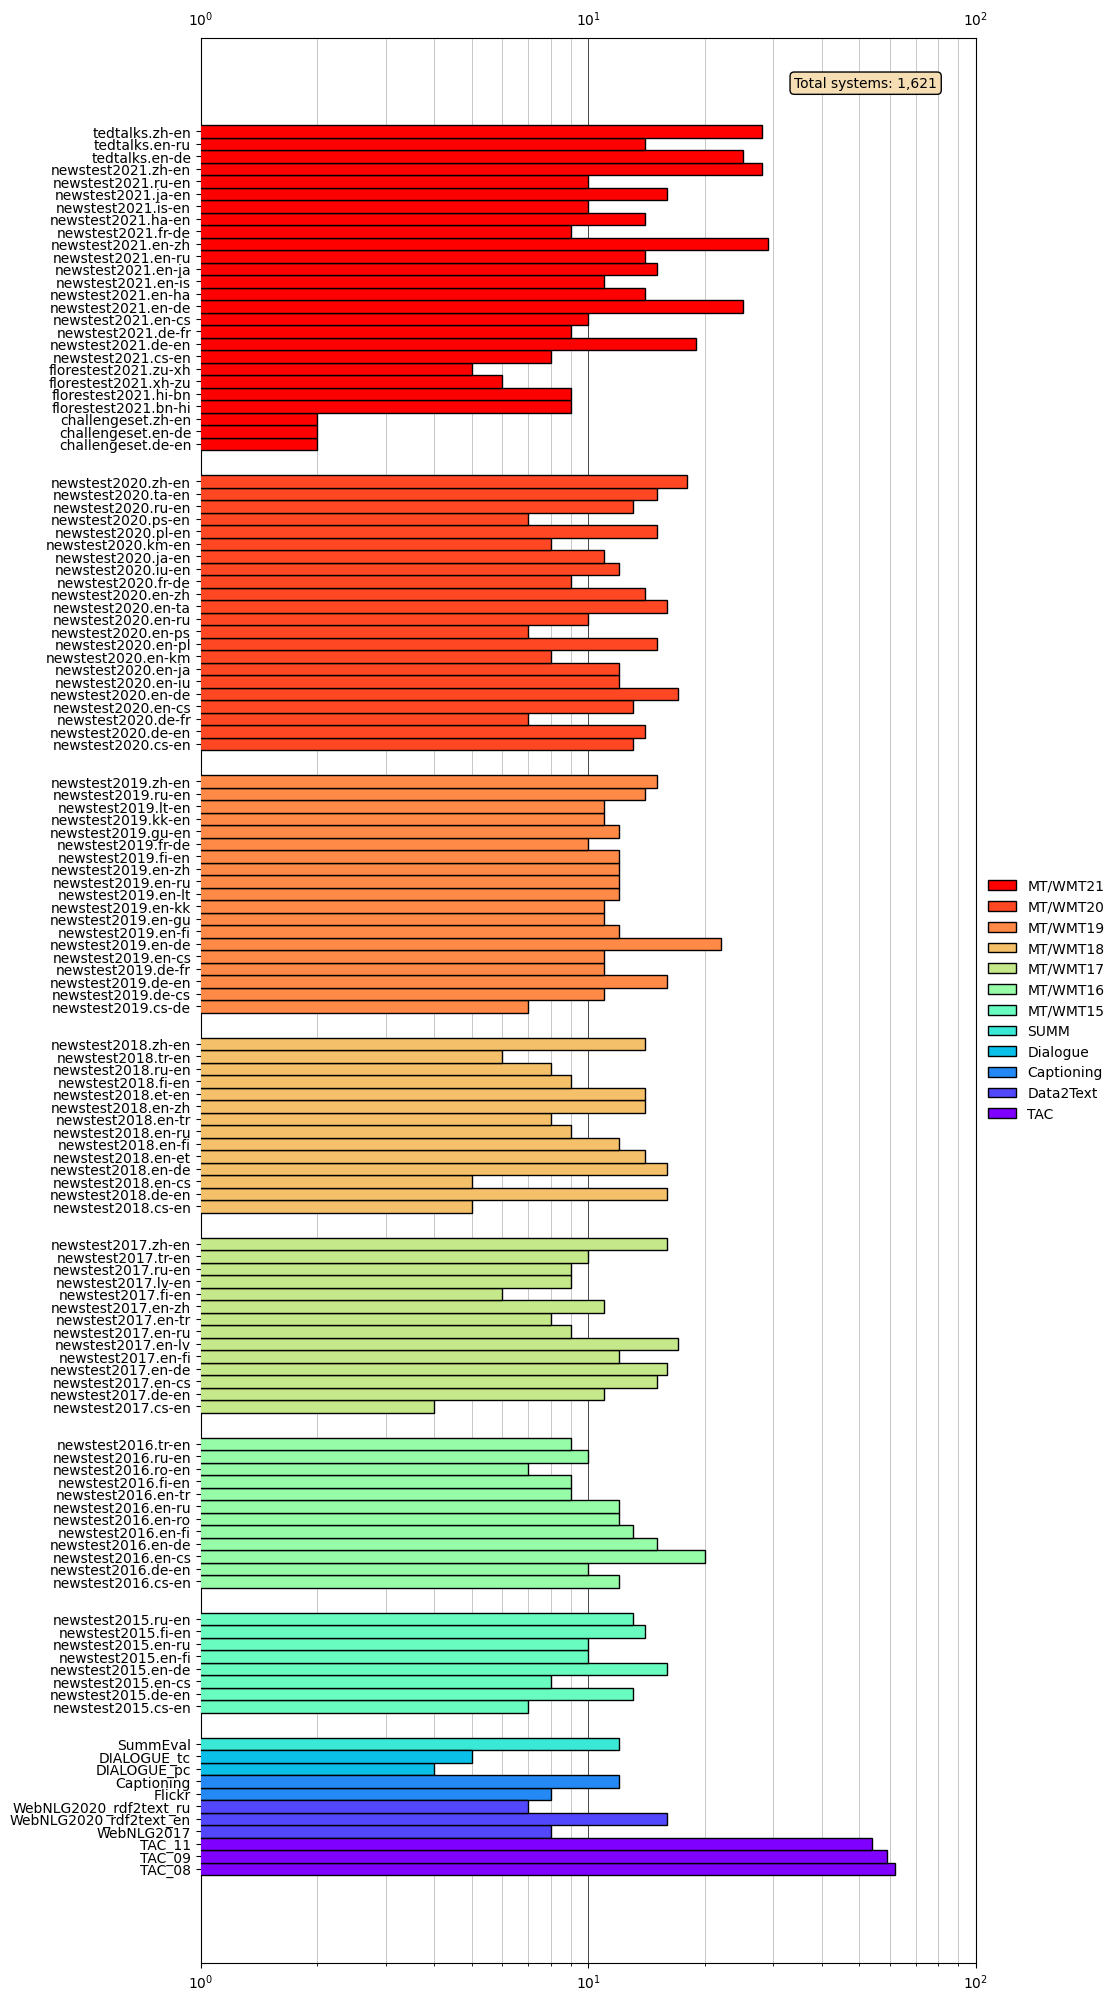

In [29]:
import matplotlib
groups=folders
categories = files
values = [sum(~dfs[file].System.duplicated()) for folder in groups for file in categories[folder]]

# Define the figure size and layout
fig, ax = plt.subplots(figsize=(10, 25))
#fig.subplots_adjust(left=0.2, bottom=0.1)

# Set the y-axis labels to the folder names
#ax.set_yticks(np.arange(len(groups)) + 0.5)
labels = sum(list(categories.values()),[])
ax.set_yticklabels(map(lambda f:filename_to_label[f],labels))
ax.tick_params(labeltop=True)
# Set the x-axis labels to the file names
#ax.set_xlabel("Number of sentences")
ax.set_xscale("log")
ax.set_xlim([1, 100])
# Calculate the bar width based on the number of categories in each group
#max_categories = max(len(categories[g]) for g in groups)
bar_width = 0.5

predefined_colors = plt.cm.rainbow(np.linspace(0, 1, len(groups)))
# Create a grouped horizontal bar chart to represent the number of lines per file and folder
start = 0
offset=0
ytick_pos=[]
for i, folder in enumerate(groups):
    if 'WMT' in folder:
        offset+=2*bar_width
    num_categories = len(categories[folder])
    #ytick_pos.append(offset+num_categories*bar_width/2)
    for j, file in enumerate(categories[folder]):
        val = values[start + j]
        if j==0:
            ax.barh(offset, val, height=bar_width, color=predefined_colors[i],edgecolor="black", label=folder,zorder=3)
        else:
            ax.barh(offset, val, height=bar_width, color=predefined_colors[i],edgecolor="black",zorder=10)
        #ax.text(offset,offset, "text", ha="right")
        
        ytick_pos.append(offset)
        offset+=bar_width
    start += num_categories
ax.set_yticks(ytick_pos)
#ax.set_xticklabels([folder for folder in groups for _ in range(len(categories[folder]))])
# Add a legend and set the title
ax.set_xticks(np.arange(1,100,5))
ax.set_xticks(np.arange(1,100,1),minor=True)
# log scale
ax.set_xscale("log")
# numbers on the x axis

ax.grid(axis='x',zorder=0,color='black',linewidth=0.5)
ax.grid(axis='x',zorder=0,linewidth=0.5,which="minor")
total = sum(values)
props = dict(boxstyle='round', facecolor='wheat')

# place a text box in upper left in axes coords
ax.text(0.95, 0.98, "Total systems: "+format(total, ","), transform=ax.transAxes, fontsize=10,
        verticalalignment='top',horizontalalignment='right', bbox=props, zorder=100)
#plt.text(bbox_to_anchor=(1.0, 0.95),text=f"Total sentences: {total}", fontsize=10, transform=ax.transAxes)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1,labelspacing=-5*bar_width,frameon=False)
# ax.set_title("Number of systems in each file")
#show the total number of sentences in the legend

#ax.text(0.5, 0.5, "text", ha="right")

# Show the plot
plt.show()
# save plot
fig.savefig("Systems.png",bbox_inches='tight')



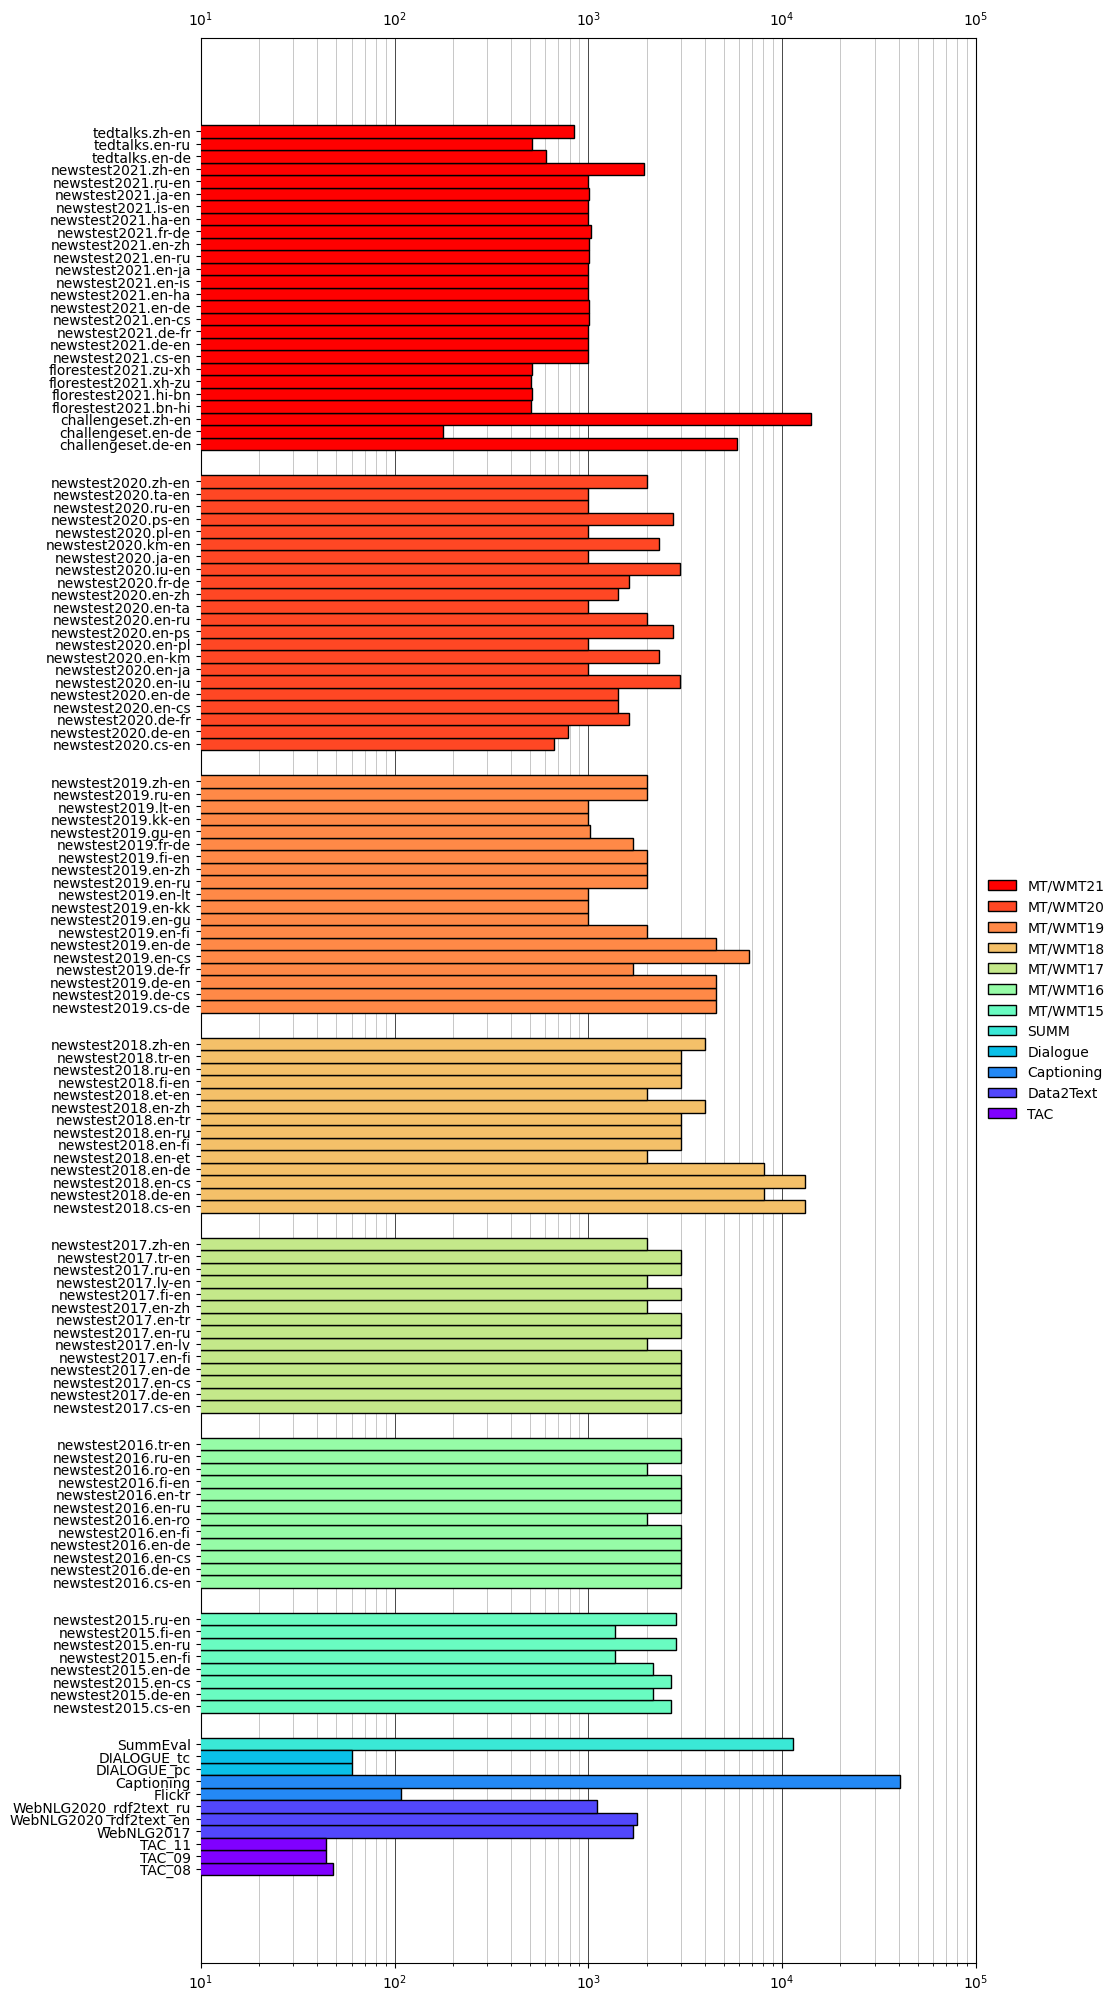

In [30]:
groups=folders
categories = files
values = [len(dfs[file])/sum(~dfs[file].System.duplicated()) for folder in groups for file in categories[folder]]

# Define the figure size and layout
fig, ax = plt.subplots(figsize=(10, 25))
#fig.subplots_adjust(left=0.2, bottom=0.1)

# Set the y-axis labels to the folder names
#ax.set_yticks(np.arange(len(groups)) + 0.5)
labels = sum(list(categories.values()),[])
ax.set_yticklabels(map(lambda f:filename_to_label[f],labels))
ax.tick_params(labeltop=True)
# Set the x-axis labels to the file names
#ax.set_xlabel("Number of sentences")
ax.set_xscale("log")
ax.set_xlim([10, 100000])
# Calculate the bar width based on the number of categories in each group
#max_categories = max(len(categories[g]) for g in groups)
bar_width = 0.5

predefined_colors = plt.cm.rainbow(np.linspace(0, 1, len(groups)))
# Create a grouped horizontal bar chart to represent the number of lines per file and folder
start = 0
offset=0
ytick_pos=[]
for i, folder in enumerate(groups):
    if 'WMT' in folder:
        offset+=2*bar_width
    num_categories = len(categories[folder])
    #ytick_pos.append(offset+num_categories*bar_width/2)
    for j, file in enumerate(categories[folder]):
        val = values[start + j]
        if j==0:
            ax.barh(offset, val, height=bar_width, color=predefined_colors[i],edgecolor="black", label=folder,zorder=3)
        else:
            ax.barh(offset, val, height=bar_width, color=predefined_colors[i],edgecolor="black",zorder=10)
        #ax.text(offset,offset, "text", ha="right")
        
        ytick_pos.append(offset)
        offset+=bar_width
    start += num_categories
ax.set_yticks(ytick_pos)
#ax.set_xticklabels([folder for folder in groups for _ in range(len(categories[folder]))])
# Add a legend and set the title
ax.grid(axis='x',zorder=0,color='black',linewidth=0.5)
ax.grid(axis='x',zorder=0,linewidth=0.5,which="both")
total = sum(values)
props = dict(boxstyle='round', facecolor='wheat')

# place a text box in upper left in axes coords
#ax.text(0.95, 0.98, "Total systems: "+format(total, ","), transform=ax.transAxes, fontsize=10,
#        verticalalignment='top',horizontalalignment='right', bbox=props, zorder=100)
#plt.text(bbox_to_anchor=(1.0, 0.95),text=f"Total sentences: {total}", fontsize=10, transform=ax.transAxes)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1,labelspacing=-5*bar_width,frameon=False)
# ax.set_title("Average number of sentences per system in each file")
#show the total number of sentences in the legend

#ax.text(0.5, 0.5, "text", ha="right")

# Show the plot
plt.show()
fig.savefig("Utterances.png",bbox_inches='tight')
